In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline



# Exercise: Exploratory Data Analysis with Pandas
## Instructions
1. Data Collection
    - Search and collect data on the following: (1993 - 2023)
        - Israel interest tares
        - US interest rates
        - USD to ILS exchange rates
    - For each dataset, create a pandas DataFrame with the following columns:
        - Year
        - Month
        - Current_Rate (Interest rate or exchange rate for that month)
        - Change_From_Last_Month (Difference in Current_Rate from the previous month)
        - Optional: You may include additional columns if you find them useful (e.g., Change_Percentage, Date).



In [3]:
path_exchage_rate = 'exchange_rate.csv'
path_usa_rate = 'usa_rate.csv'
path_israeli_rate = 'israeli_rate.csv'

In [4]:
# your code here
df_israeli_rate = pd.read_csv(path_israeli_rate)
df_israeli_rate = df_israeli_rate.rename(columns={'CCUSSP02ILM650N': 'Rate'})
df_israeli_rate


,DATE,Rate
0,1993-01-01,2.765
1,1993-02-01,2.795
2,1993-03-01,2.768
3,1993-04-01,2.728
4,1993-05-01,2.729
...,...,...
367,2023-08-01,3.801
368,2023-09-01,3.824
369,2023-10-01,3.801
370,2023-11-01,3.714


In [5]:
# your code here
df_exchange_rate = pd.read_csv(path_exchage_rate)
df_exchange_rate = df_exchange_rate.rename(columns={'Date    ': 'Date'})
df_exchange_rate

,Date,USD
0,06/11/2024,3.739
1,05/11/2024,3.748
2,04/11/2024,3.749
3,01/11/2024,3.761
4,31/10/2024,3.714
...,...,...
7745,04/11/1993,2.935
7746,03/11/1993,2.940
7747,02/11/1993,2.935
7748,01/11/1993,2.929


In [6]:
df_usa_rate = pd.read_csv(path_usa_rate)
df_usa_rate

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
839,2024-06-01,5.33
840,2024-07-01,5.33
841,2024-08-01,5.33
842,2024-09-01,5.13


In [7]:
usa_rate_table = df_usa_rate

usa_rate_table['DATE'] = pd.to_datetime(usa_rate_table['DATE'])
usa_rate_table['Year'] = usa_rate_table['DATE'].dt.year
usa_rate_table['Month'] = usa_rate_table['DATE'].dt.month
usa_rate_table['Current_rate'] = usa_rate_table['FEDFUNDS']
usa_rate_table['Change_From_Last_Month'] = usa_rate_table['FEDFUNDS'].diff()
usa_rate_table = usa_rate_table.drop(['FEDFUNDS'], axis=1)
usa_rate_table = usa_rate_table.drop(['DATE'], axis=1)
usa_rate_table



,Year,Month,Current_rate,Change_From_Last_Month
0,1954,7,0.80,NaN
1,1954,8,1.22,0.42
2,1954,9,1.07,-0.15
3,1954,10,0.85,-0.22
4,1954,11,0.83,-0.02
...,...,...,...,...
839,2024,6,5.33,0.00
840,2024,7,5.33,0.00
841,2024,8,5.33,0.00
842,2024,9,5.13,-0.20


In [9]:
israel_rate_table = df_israeli_rate

israel_rate_table['DATE'] = pd.to_datetime(israel_rate_table['DATE'])
israel_rate_table['Year'] = israel_rate_table['DATE'].dt.year
israel_rate_table['Month'] = israel_rate_table['DATE'].dt.month
israel_rate_table['Current_rate'] = israel_rate_table['Rate']
israel_rate_table['Change_From_Last_Month'] = israel_rate_table['Rate'].diff()
israel_rate_table = israel_rate_table.drop(['DATE'], axis=1)
israel_rate_table

,Rate,Year,Month,Current_rate,Change_From_Last_Month
0,2.765,1993,1,2.765,NaN
1,2.795,1993,2,2.795,0.030
2,2.768,1993,3,2.768,-0.027
3,2.728,1993,4,2.728,-0.040
4,2.729,1993,5,2.729,0.001
...,...,...,...,...,...
367,3.801,2023,8,3.801,0.108
368,3.824,2023,9,3.824,0.023
369,3.801,2023,10,3.801,-0.023
370,3.714,2023,11,3.714,-0.087


In [10]:
exchaned = df_exchange_rate
exchaned['Date'] = pd.to_datetime(exchaned['Date'], dayfirst=True)  
exchaned['Year'] = exchaned['Date'].dt.year
exchaned['Month'] = exchaned['Date'].dt.month
exchaned['Current_rate'] = exchaned['USD']
exchaned['Change_From_Last_Month'] = exchaned['USD'].diff()
exchaned = exchaned.drop(['USD'], axis=1)
exchaned = exchaned.drop(['Date'], axis=1)
exchaned


,Year,Month,Current_rate,Change_From_Last_Month
0,2024,11,3.739,NaN
1,2024,11,3.748,0.009
2,2024,11,3.749,0.001
3,2024,11,3.761,0.012
4,2024,10,3.714,-0.047
...,...,...,...,...
7745,1993,11,2.935,-0.003
7746,1993,11,2.940,0.005
7747,1993,11,2.935,-0.005
7748,1993,11,2.929,-0.006


## Part A: Single DataFrame Analysis 
1. Display the first 5 rows of the US interest rates DataFrame.

2. Calculate the average Israeli interest rate over the period covered by your data.

3. Find the month and year when the USD to ILS exchange rate had the highest increase from the previous month.

4. Determine the total number of months where the US interest rate decreased compared to the previous month.

5. Add a new column to the Israeli interest rates DataFrame called Change_Percentage, representing the percentage change from the previous month.



In [11]:
usa_rate_table.head(5)

,Year,Month,Current_rate,Change_From_Last_Month
0,1954,7,0.80,NaN
1,1954,8,1.22,0.42
2,1954,9,1.07,-0.15
3,1954,10,0.85,-0.22
4,1954,11,0.83,-0.02


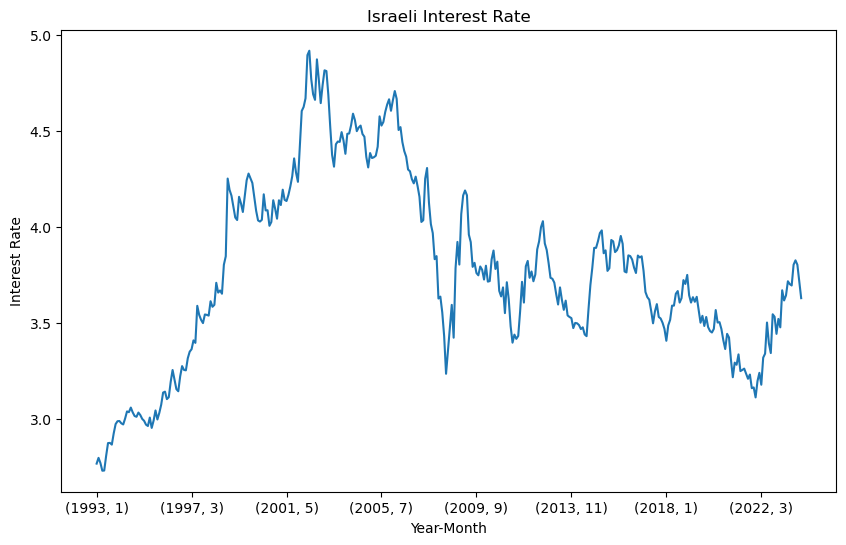

In [12]:
# fed.groupby(['Year' ,'Month']).mean()
plt.figure(figsize=(10,6))
israel_rate_table.groupby(['Year' ,'Month']).mean()['Current_rate'].plot()
plt.xlabel('Year-Month')
plt.ylabel('Interest Rate')
plt.title('Israeli Interest Rate')
plt.show()


In [13]:
# exchaned['Change_From_Last_Month'].max()
max_values = exchaned[['Change_From_Last_Month', 'Year', 'Month']].max()
max_values

Change_From_Last_Month       0.144
Year                      2024.000
Month                       12.000
dtype: float64

In [14]:
use_rate_decreased = usa_rate_table.loc[usa_rate_table['Change_From_Last_Month'] >= 0]
num_of_months_decreased = len(use_rate_decreased)
num_of_months_decreased


515

In [15]:
israel_rate_table['Change_Percentage'] = israel_rate_table['Rate'].pct_change()

## Part B: Merging DataFrames
1. Merge the US and Israeli interest rates DataFrames on Year and Month.

2. In the merged DataFrame, create a new column Rate_Difference that shows the difference between the Israeli and US interest rates for each month.

3. Identify all months when the Israeli interest rate was at least 1% higher than the US interest rate - IH (Israeli Higher).
Identify all months when the US interest rate was at least 1% higher than the Israeli interest rate - UH (US Higher).
Identify all months when the interest rates were within 1% of each other - N (Near)
make a new column called Rate_Comparison with the following values: IH, UH, or N.

4. Merge the exchange rate DataFrame with the merged interest rates DataFrame.

5. After merging all three DataFrames, find the correlation between the Rate_Difference and the Current_Rate of the exchange rate.
hint: find the connection between the difference in interest rates and the exchange rates, use any method you think is appropriate.
provide an explanation of the results (in Hebrew) - at least 2 rows of text + a proof of the connection(some output) you found.


In [16]:
merged_df = pd.merge(israel_rate_table, usa_rate_table, on=['Year', 'Month'])

In [17]:
merged_df['Rate_Difference'] = merged_df['Current_rate_x'] - merged_df['Current_rate_y']

In [18]:
merged_df['Rate_Comparison'] = merged_df.apply(lambda row: 'UH' if row['Current_rate_x'] > row['Current_rate_y'] else ('IH' if row['Current_rate_x'] < row['Current_rate_y'] else 'N'), axis=1)

merged_df

,Rate,Year,Month,Current_rate_x,Change_From_Last_Month_x,Change_Percentage,Current_rate_y,Change_From_Last_Month_y,Rate_Difference,Rate_Comparison
0,2.765,1993,1,2.765,NaN,NaN,3.02,0.10,-0.255,IH
1,2.795,1993,2,2.795,0.030,0.010850,3.03,0.01,-0.235,IH
2,2.768,1993,3,2.768,-0.027,-0.009660,3.07,0.04,-0.302,IH
3,2.728,1993,4,2.728,-0.040,-0.014451,2.96,-0.11,-0.232,IH
4,2.729,1993,5,2.729,0.001,0.000367,3.00,0.04,-0.271,IH
...,...,...,...,...,...,...,...,...,...,...
367,3.801,2023,8,3.801,0.108,0.029245,5.33,0.21,-1.529,IH
368,3.824,2023,9,3.824,0.023,0.006051,5.33,0.00,-1.506,IH
369,3.801,2023,10,3.801,-0.023,-0.006015,5.33,0.00,-1.529,IH
370,3.714,2023,11,3.714,-0.087,-0.022889,5.33,0.00,-1.616,IH


In [144]:
merged_df_with_exchange = pd.merge(merged_df, exchaned, on=['Year', 'Month'])
merged_df_with_exchange

,Year,Month,exchanged_rate,Change_From_Last_Month_x,Change_Percentage,Change_From_Last_Month_y,Current_rate_y,Rate_Difference,Rate_Comparison,Current_rate,Change_From_Last_Month
0,1993,10,2.923,0.059,0.020601,-0.10,2.99,-0.067,IH,2.923,-0.006
1,1993,11,2.971,0.048,0.016421,0.03,3.02,-0.049,IH,2.971,-0.003
2,1993,11,2.971,0.048,0.016421,0.03,3.02,-0.049,IH,2.970,-0.001
3,1993,11,2.971,0.048,0.016421,0.03,3.02,-0.049,IH,2.960,-0.010
4,1993,11,2.971,0.048,0.016421,0.03,3.02,-0.049,IH,2.960,0.000
...,...,...,...,...,...,...,...,...,...,...,...
7539,2023,12,3.627,-0.087,-0.023425,0.00,5.33,-1.703,IH,3.703,0.005
7540,2023,12,3.627,-0.087,-0.023425,0.00,5.33,-1.703,IH,3.709,0.006
7541,2023,12,3.627,-0.087,-0.023425,0.00,5.33,-1.703,IH,3.728,0.019
7542,2023,12,3.627,-0.087,-0.023425,0.00,5.33,-1.703,IH,3.708,-0.020


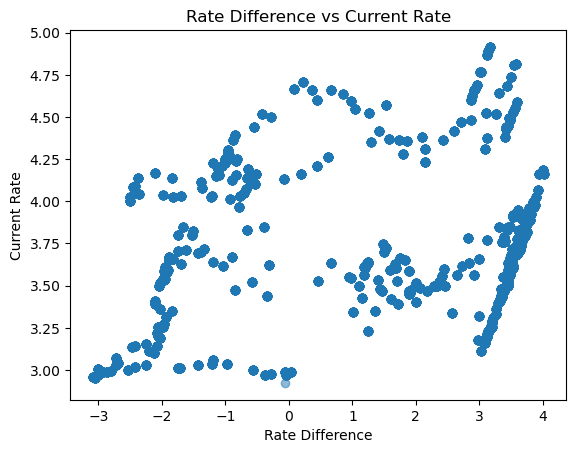

In [145]:
plt.scatter(merged_df_with_exchange['Rate_Difference'],merged_df_with_exchange['exchanged_rate'], alpha=0.5)
plt.xlabel('Rate Difference')
plt.ylabel('Current Rate')
plt.title('Rate Difference vs Current Rate')
plt.show()

In [ ]:
#ניכר שיש קשר חיובי בין שער החליפין שככל שהשער עולה גם הריבית עולה אך זה נכון בעיקר לקצוות כשהשער נמוך בקצה או גבוה בקצה לעןמת אם הוא באמצע אין השפעה

## Part C: Analyzing Relationships Between DataFrames
1. Analyze whether increases in US interest rates are associated with increases or decreases in the USD to ILS exchange rate in the same month.

2. Determine if changes in the Israeli interest rate have a stronger impact on the exchange rate than changes in the US interest rate.

3. Find any time lags in the effect of interest rate changes on the exchange rate. For example, does a change in US interest rates affect the exchange rate in the following month?
(כלומר- האם כשיש שינוי בריבית כלשהי - האם מייד יש שינוי בשער ההמרה? או שיש דיליי של חודש/חודשים עד שמרגישים את ההשפעה - אם בכלל?)

4. Calculate the rolling past 3-month average of the exchange rate for each data time, and add it as a new column.

5. Identify any periods where both US and Israeli interest rates were decreasing, and analyze how the exchange rate behaved during those periods.



In [ ]:
# Bonus 

# Bonus
choose 3 global / local events or periods that you think could have affected the exchange rate or interest rates
and analyze the effect of these events on the data you collected.
show proof of your analysis that supports your claim.

(כלומר- תבחנו אירועים שקרו בתקופה שאתם עובדים עליה ובדקו איך הם השפיעו על הנתונים שאתם עובדים איתם)
למשל: בחירות בארה״ב, בחירות בישראל, רוסיה אוקראינה, מלחמות בישראל וכו׳.

In [ ]:
# Your code here